# Lesson3 张量的广播和科学运算

* 数学运算与算子

作为PyTorch中执行深度学习的基本数据类型，张量拥有非常多的数学运算函数和方法，以及对应的一系列计算规则。在PyTorch中能够作用于Tensor的运算，被统一称为算子。并且相比于NumPy，PyTorch给出了更多规范的算子（运算）的分类，从而方便用户在不同场景调用不同类型的算子（运算）。

* 数学运算的分类

PyTorch总共为Tensor设计了六大类数学运算，分别是：

    - 1.逐点运算(Pointwise Ops):指针对Tensor中每个元素执行的相同运算操作
    - 2.规约运算(Reduction Ops):指对某一张量进行操作的到某种总结值
    - 3.比较运算(Comparision Ops):指对多个张量进行比较运算的相关方法
    - 4.谱运算(Spectral Ops):指涉及信号处理傅立叶变化的操作
    - 5.BLAS和LAPACK运算:指的是基本线性代数程序集(Basic Linear Algeria Subprograms)和线性代数包(Linear Algeria Package)中定义的，主要用于线性代数科学计算的函数和方法
    - 6.其他运算(Other Ops):其他未被归类的数学运算

## 1.张量的广播(Broadcast)特性

张量具备和NumPy相同的广播特性，也就是允许不同形状的张量之间进行计算。

### 1.相同形状的张量计算

根据官网说法，‘same shapes are always broadcastable’，相同形状数组总是可以进行广播计算。这里简单强调一下，虽然我们往往觉得不同形状之间的张量计算才是应用到了广播特性，但其实相同形状的张量计算，尽管时对应位置元素进行计算，但本质上也是应用到了广播特性。

In [2]:
import torch
import numpy as np

t1 = torch.arange(3)
t1

tensor([0, 1, 2])

In [3]:
t1 + t1  #对应位置元素依次相加

tensor([0, 2, 4])

思考：如果两个list相加呢？

In [4]:
L1 = [1, 2]
L2 = [3, 4]
L1 + L2

[1, 2, 3, 4]

### 2.不同形状的张量计算

广播的特性是在不同形状的张量进行计算时，一个或多个张量通过隐式转化，转化成相同形状的两个张量，从而完成计算的特性，但并非任何两个不同形状的张量都可以通过广播特性进行计算，因此，我们需要了解广播的基本规则及其核心依据。

#### 2.1 标量和任意形状的张量

标量可以和任意形状的张量进行计算，计算过程就是标量和张量的每一个元素进行计算。

In [6]:
t1

tensor([0, 1, 2])

In [5]:
t1 + 1

tensor([1, 2, 3])

In [7]:
# 二维加零维
t1 + torch.tensor(1)

tensor([1, 2, 3])

In [8]:
t2 = torch.zeros((3, 4))
t2

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [9]:
t2 + 1

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

#### 2.2 相同维度，不同形状的张量之间计算

In [10]:
t2.shape

torch.Size([3, 4])

对于返回结果，我们可以看成是一个序列，代表着张量各个维度的信息。当然，对于二维张量，由于我们可以将其视作一个矩阵，因此我们可以说t2是拥有三行四列的二维张量，但这种理解方式对于更高维度张量存在一定的局限，因此我们需要树立另一种理解方法，即：t2是由3个一维张量组成，并且该一维张量，每个都包括4个元素。类似的，我们可以创建更高维度张量并对其形状进行解释。

In [11]:
t3 = torch.zeros(3, 4, 5)
t3

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [12]:
t3.shape

torch.Size([3, 4, 5])

t3:t3是3个二维张量组成的三维张量，并且每个二维张量，都是由4个包含5个元素的一维张量组成。由二维拓展到三维，即可拓展至N维。

In [13]:
t21 = torch.ones(1, 4)

In [14]:
t21

tensor([[1., 1., 1., 1.]])

t21的形状是(1, 4),和t2的形状(3, 4)在第一个分量的取值不同，但该分量上t21取值为1，因此可以广播，也就可以进行计算

In [15]:
t21 + t2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

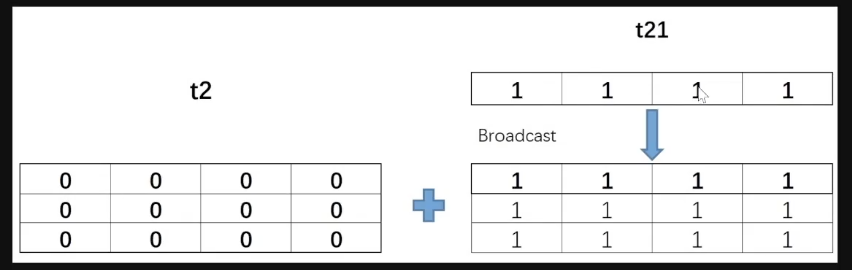

In [17]:
t22 = torch.ones((3, 1))
t22

tensor([[1.],
        [1.],
        [1.]])

In [19]:
t2.shape

torch.Size([3, 4])

In [18]:
t22 + t2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

t22的形状是(3, 1),和t2的形状(3, 4)在第二个分量的取值不同，但该分量上t22取值为1，因此可以广播，也就可以进行计算

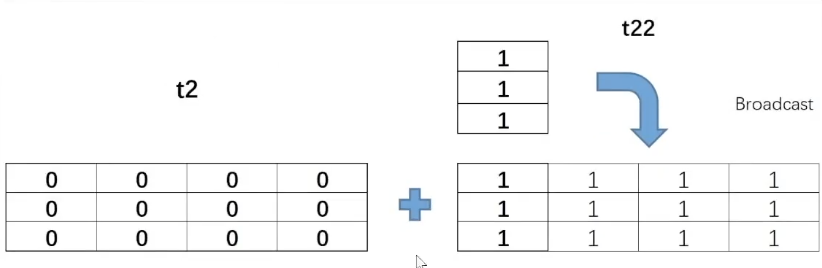

In [20]:
t23 = torch.ones(2, 4)
t23.shape

torch.Size([2, 4])

**注意：此时t2和t23的形状第一个分量维度不同，但二者取值均不为1，因此无法广播**

In [21]:
t2 + t23

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [22]:
t24 = torch.arange(3).reshape(3, 1)
t24

tensor([[0],
        [1],
        [2]])

In [23]:
t25 = torch.arange(3).reshape(1, 3)
t25

tensor([[0, 1, 2]])

此时，t24的形状是(3, 1)，而t25的形状是(1, 3)，二者的形状在两个分量上均不相同，但都存在1的情况，因此可以广播

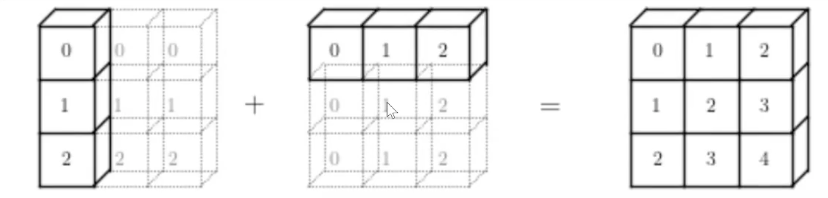

三维张量的广播

In [24]:
t3 = torch.zeros(3, 4, 5)
t3

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [26]:
t31 = torch.ones(3, 4, 1)
t31

tensor([[[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]]])

In [27]:
t3 + t31

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [28]:
t32 = torch.ones(3, 1, 5)
t32

tensor([[[1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.]]])

In [29]:
t32 + t3

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

两个张量的形状上有两个分量不同时，只要不同的分量仍然有一个取值为1，则仍然可以广播

In [30]:
t3.shape

torch.Size([3, 4, 5])

In [31]:
t33 = torch.ones(1, 1, 5)

In [32]:
t33

tensor([[[1., 1., 1., 1., 1.]]])

In [33]:
t3 + t33

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

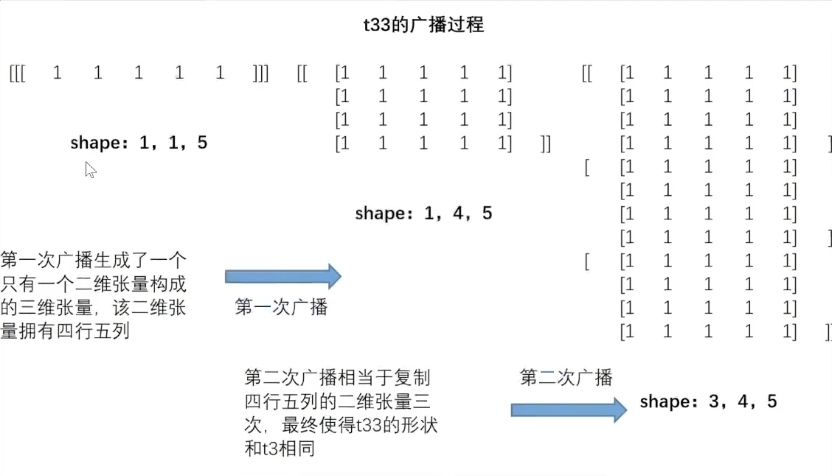

t33和t3相当于一个一维张量和一个三维张量计算时的广播过程

#### 2.3 不同维度的张量计算过程中广播

在理解相同维度，不同形状的张量广播之后，对于不同维度的张量之间的广播其实就会容易很多，因为对于不同维度的张量，我们首先可以将低维的张量升维，然后依据相同维度不同形状的张量广播规则进行广播。而低维向量的升维很简单，只需将高维度方向的形状填充为1即可，例如：

In [34]:
# 二维张量转化为三维张量
t2 = torch.arange(4).reshape(2, 2)
t2

tensor([[0, 1],
        [2, 3]])

In [35]:
# 转化为三维张量
t2.reshape(1, 2, 2)

tensor([[[0, 1],
         [2, 3]]])

转化之后表示只包含一个二维张量的三维张量，并且二维张量为t2

In [36]:
# 转化为四维张量
t2.reshape(1, 1, 2, 2)

tensor([[[[0, 1],
          [2, 3]]]])

转化后表示只包含一个三维张量的四维张量，且三维张量只包含一个二维张量，且二维张量维t2

In [37]:
t3 = torch.zeros(3, 2, 2)

In [39]:
t2

tensor([[0, 1],
        [2, 3]])

t3和t2的计算过程相当于形状为(1, 2, 2)和(3, 2, 2)的两个张量进行计算

In [38]:
t3 + t2

tensor([[[0., 1.],
         [2., 3.]],

        [[0., 1.],
         [2., 3.]],

        [[0., 1.],
         [2., 3.]]])

In [40]:
t3 + t2.reshape(1, 2, 2)

tensor([[[0., 1.],
         [2., 3.]],

        [[0., 1.],
         [2., 3.]],

        [[0., 1.],
         [2., 3.]]])

思考：形状为(2, 1)的张量和形状为(3, 2, 3)的张量可以进行广播吗？计算过程怎么样？

可以。(2, 1)->(1, 2, 1)->(3, 2, 3)

## 二.逐点运算(Pointwise Ops)

逐点运算主要包括数学基本运算，数值调整运算和数据科学运算三块

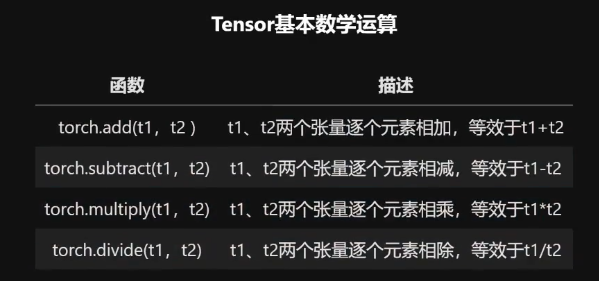

In [41]:
t1 = torch.tensor([1, 2])
t2 = torch.tensor([3, 4])

In [42]:
torch.add(t1, t2)

tensor([4, 6])

In [43]:
t1 + t2

tensor([4, 6])

In [44]:
t1 /t2

tensor([0.3333, 0.5000])

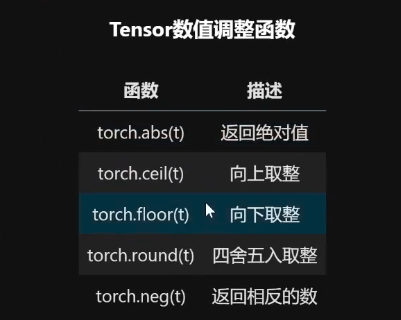

In [45]:
t = torch.randn(5)
t

tensor([ 0.9003, -0.6672,  0.5130,  0.8207, -0.4348])

In [46]:
torch.round(t)

tensor([ 1., -1.,  1.,  1., -0.])

In [47]:
torch.abs(t)

tensor([0.9003, 0.6672, 0.5130, 0.8207, 0.4348])

In [48]:
torch.neg(t)

tensor([-0.9003,  0.6672, -0.5130, -0.8207,  0.4348])

**注：虽然此类函数是数值调整函数，但并不会对原对象进行调整，而是输出新的结果**

In [49]:
t   # t本身并未发生变化

tensor([ 0.9003, -0.6672,  0.5130,  0.8207, -0.4348])

若要对原对象本身进行修改，则可考虑使用方法_()的表达形式，对对象本身进行修改。此时方法就是上述同名函数

In [50]:
t.abs_()

tensor([0.9003, 0.6672, 0.5130, 0.8207, 0.4348])

In [51]:
t

tensor([0.9003, 0.6672, 0.5130, 0.8207, 0.4348])

In [52]:
t.neg_()

tensor([-0.9003, -0.6672, -0.5130, -0.8207, -0.4348])

In [53]:
t

tensor([-0.9003, -0.6672, -0.5130, -0.8207, -0.4348])

除了上述数值调整函数有对应的同名方法外，本节介绍的许多科学计算都有同名方法。

In [54]:
t.exp_()

tensor([0.4064, 0.5132, 0.5987, 0.4401, 0.6474])

In [55]:
t

tensor([0.4064, 0.5132, 0.5987, 0.4401, 0.6474])

### Tensor常用科学计算
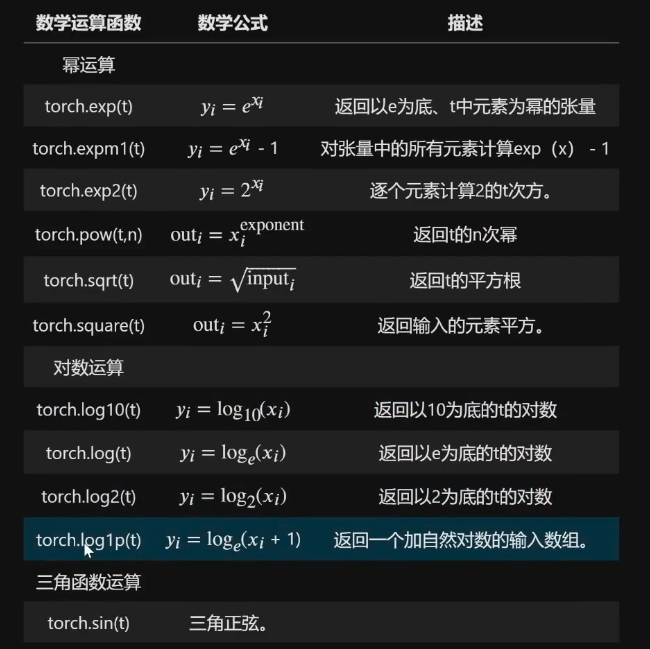
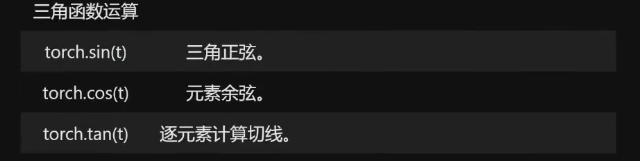    

* tensor的大多数科学计算只能作用于tensor对象

In [56]:
# 2的2次方
torch.pow(2, 2)

TypeError: pow() received an invalid combination of arguments - got (int, int), but expected one of:
 * (Tensor input, Tensor exponent, *, Tensor out)
 * (Number self, Tensor exponent, *, Tensor out)
 * (Tensor input, Number exponent, *, Tensor out)


In [57]:
torch.pow(torch.tensor(2), 2)

tensor(4)

相比于Python原生数据类型，张量是一类更加特殊的对象，例如张量可以指定运行在CPU或GPU上，因此很多张量的科学计算函数都不允许张量和Python原生数值型对象混合使用。

* tensor的大多数科学运算具有一定的静态性

所谓静态性，指的是对输入的张量类型有明确的要求，如果部分函数只能输入浮点型张量，而不能输入整数型张量。

In [63]:
t = torch.arange(1, 4)
t.dtype

torch.int64

In [64]:
torch.exp(t)

tensor([ 2.7183,  7.3891, 20.0855])

需要注意的是，虽然Python是动态编译的编程语言，但在PyTorch中，由于会涉及GPU计算，因此很多时候元素类型不会在实际执行函数计算时进行调整。此处的科学运算大多数都要求对象类型是浮点型，我们需要提前进行类型转化。

In [65]:
t1 = t.float()
t1

tensor([1., 2., 3.])

In [67]:
torch.exp(t1)

tensor([ 2.7183,  7.3891, 20.0855])

In [66]:
torch.expm1(t1)

tensor([ 1.7183,  6.3891, 19.0855])

在数值科学计算中，expm1函数和log1p函数是一对对应的函数关系

In [68]:
torch.exp2(t1)

tensor([2., 4., 8.])

In [70]:
t

tensor([1, 2, 3])

In [69]:
torch.pow(t, 2)

tensor([1, 4, 9])

In [71]:
torch.square(t)

tensor([1, 4, 9])

In [72]:
torch.sqrt(t1)

tensor([1.0000, 1.4142, 1.7321])

In [73]:
torch.pow(t1, 0.5)

tensor([1.0000, 1.4142, 1.7321])

In [74]:
torch.log10(t1)

tensor([0.0000, 0.3010, 0.4771])

In [76]:
torch.log(t1)  # 以e为底

tensor([0.0000, 0.6931, 1.0986])

In [77]:
torch.log2(t1)

tensor([0.0000, 1.0000, 1.5850])

In [78]:
torch.exp(torch.log(t1))

tensor([1., 2., 3.])

In [79]:
torch.exp2(torch.log2(t1))

tensor([1., 2., 3.])

* log1p和expm1

log1p是进行$y_i=log_e(x_i+1)$计算，而expm则是进行$y_i=e^{x_i}-1$计算，二者为逆运算

* 排序运算：sort

在PyTorch中，sort排序函数将同时返回排序结果和对应的索引值的排列

In [80]:
t = torch.tensor([1.0, 2.0, 3.0])
t

tensor([1., 2., 3.])

In [81]:
# 升序排列
torch.sort(t)

torch.return_types.sort(
values=tensor([1., 2., 3.]),
indices=tensor([0, 1, 2]))

In [82]:
#降序排列
torch.sort(t, descending=True)

torch.return_types.sort(
values=tensor([3., 2., 1.]),
indices=tensor([2, 1, 0]))

## 三.规约运算

规约运算指的是针对某张量进行某种总结，最后得出一个具体总结值的函数。此类函数主要包含了数据科学领域内的诸多统计分析函数，如均值，极值，方差，中位数函数等等

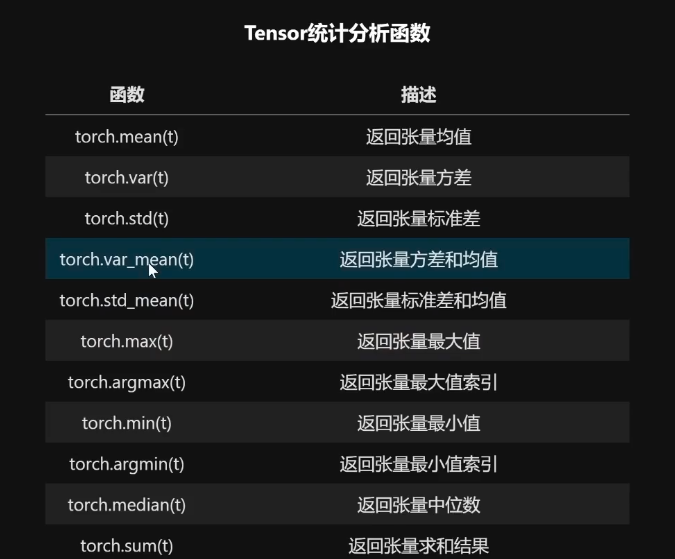
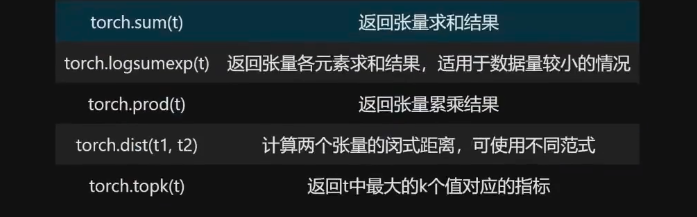

In [83]:
t = torch.arange(10).float()
t

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [84]:
torch.mean(t)  #均值

tensor(4.5000)

In [85]:
#标准差，均值
torch.std_mean(t)

(tensor(3.0277), tensor(4.5000))

In [86]:
torch.max(t)

tensor(9.)

In [87]:
#返回最大值的索引
torch.argmax(t)

tensor(9)

In [88]:
torch.median(t)   #中位数

tensor(4.)

In [89]:
torch.sum(t)  #求和

tensor(45.)

In [90]:
torch.prod(t)  #求积

tensor(0.)

In [91]:
torch.prod(torch.tensor([1, 2, 3]))

tensor(6)

In [92]:
t1 = torch.tensor([1.0, 2])

In [93]:
t1

tensor([1., 2.])

In [99]:
t2 = torch.tensor([3.0, 4])
t2

tensor([3., 4.])

In [94]:
t

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [95]:
torch.topk(t, 2)

torch.return_types.topk(
values=tensor([9., 8.]),
indices=tensor([9, 8]))

* dist计算距离

dist函数可计算闵式距离(闵可夫斯基距离)，通过输入不同的p值，可以计算多种类型的距离，如欧式距离，曼哈顿距离等。闵可夫斯基距离公式如下：
$$D(x, y)=(\sum_{u=1}^n|x_u-y_u|^p)^{1/p}$$   
p=2时，计算欧式距离

In [96]:
torch.dist(t1, t2, 2)

tensor(2.8284)

In [97]:
torch.sqrt(torch.tensor(8.0))

tensor(2.8284)

p=1时为曼哈顿距离

In [100]:
torch.dist(t1, t2, 1)   #2 + 2=4

tensor(4.)

* 规约运算的维度

由于规约运算是一个序列返回一个结果，因此若针对高维张量，则可指定某维度进行计算。

In [101]:
t2 = torch.arange(12).float().reshape(3, 4)
t2

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [102]:
t2.shape

torch.Size([3, 4])

In [103]:
# 按照第一个维度求和，按列求和
torch.sum(t2, dim=0)

tensor([12., 15., 18., 21.])

In [104]:
# 按照第二个维度求和，按行求和
torch.sum(t2, dim=1)

tensor([ 6., 22., 38.])

In [105]:
# 创建一个2*3*4的三维张量
t3 = torch.arange(24).float().reshape(2, 3, 4)
t3

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [106]:
t3.shape

torch.Size([2, 3, 4])

In [107]:
torch.sum(t3, dim=0)

tensor([[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]])

In [108]:
torch.sum(t3, dim=1)

tensor([[12., 15., 18., 21.],
        [48., 51., 54., 57.]])

In [109]:
torch.sum(t3, dim=2)

tensor([[ 6., 22., 38.],
        [54., 70., 86.]])

dim参数和shape返回结果一一对应

* 二维张量的排序

和上述过程类似，在进行排序过程中，二维张量也可以按行或者按列进行排序

In [110]:
t22 = torch.randn(3, 4)
t22

tensor([[ 1.4286,  1.4452, -0.4427,  0.5551],
        [-0.6716, -0.0299,  0.4241, -0.8085],
        [-0.4473,  0.7962,  0.5835,  0.5887]])

In [111]:
# 默认情况时按照列进行升序排序
torch.sort(t22)

torch.return_types.sort(
values=tensor([[-0.4427,  0.5551,  1.4286,  1.4452],
        [-0.8085, -0.6716, -0.0299,  0.4241],
        [-0.4473,  0.5835,  0.5887,  0.7962]]),
indices=tensor([[2, 3, 0, 1],
        [3, 0, 1, 2],
        [0, 2, 3, 1]]))

In [113]:
# 修改dim 和 descending参数，使得按行进行降序排序
torch.sort(t22, dim=0, descending=True)

torch.return_types.sort(
values=tensor([[ 1.4286,  1.4452,  0.5835,  0.5887],
        [-0.4473,  0.7962,  0.4241,  0.5551],
        [-0.6716, -0.0299, -0.4427, -0.8085]]),
indices=tensor([[0, 0, 2, 2],
        [2, 2, 1, 0],
        [1, 1, 0, 1]]))

## 四.比较运算

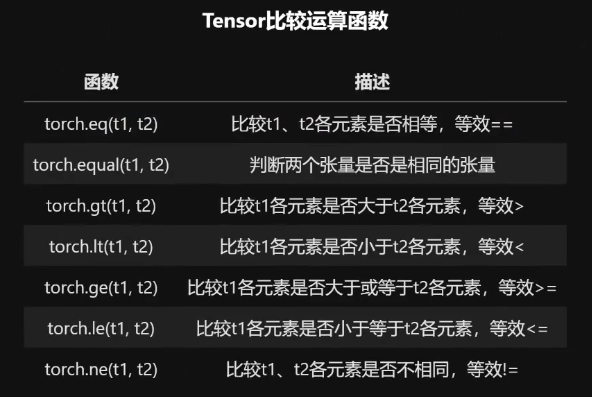

In [114]:
t1 = torch.tensor([1.0, 3, 4])

In [115]:
t2 = torch.tensor([1.0, 2, 5])

In [116]:
t1 == t2

tensor([ True, False, False])

In [118]:
torch.equal(t1, t2)   #判断t1,t2是否是相同的张量

False

In [119]:
torch.eq(t1, t2)  #比较给元素是否相同

tensor([ True, False, False])

In [120]:
t1 > t2

tensor([False,  True, False])

In [121]:
t1 >= t2

tensor([ True,  True, False])